# Problem Set 6 - PHYS 305, Fall 2020
### Due Nov 3, 5 pm on D2L

In [1]:
# Import Libraries
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 300
from matplotlib.ticker import (AutoMinorLocator)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

## Problem 1: Finite Difference Methods [20 points]

Let's revisit the BVP from Lecture 23:
$$
    u_{xx} = e^x, \quad x \in [0, 1] \quad \text{with} \quad u(0) = 0.0, \text{ and } u(1) = 3\,,
$$
which has the analytic solution

\begin{align*}
    u(x) &= (4 - e) x - 1 + e^x\,.
\end{align*}

**Solve this BVP using the Finite Difference Method with the following expressions for the five-point stencil for the second-order derivative**:
\begin{align*}
\text{centered} & \quad u_{xx}(x_i)\approx \frac{-u(x_{i-2})+16u(x_{i-1}) - 30 u(x_i) + 16 u(x_{i+1})- u(x_{i+2})}{12\Delta x^2}\\
\text{forward} & \quad u_{xx}(x_i)\approx \frac{11u(x_{i-1}) - 20 u(x_i) + 6 u(x_{i+1})+ 4u(x_{i+2}) - u(x_{i+3})}{12\Delta x^2}\,, \text{for}\,i=1\\
\text{backwardward} & \quad u_{xx}(x_i)\approx \frac{-u(x_{i-3})+4u(x_{i-2})+6u(x_{i-1}) - 20 u(x_i) +11 u(x_{i+1})}{12\Delta x^2}\,, \text{for}\,i=N
\end{align*}
with end points $x_0= 0$ and $x_{N+1} = 1$.

### 1. Construct the corresponding Finite Difference Expression for $A$, and incorporate the boundary conditions.

In [2]:
# Problem setup
a = 0.0
b = 1.0
u_a = 0.0
u_b = 3.0
f = lambda x: np.exp(x)
u_true = lambda x: (4.0 - np.exp(1.0)) * x - 1.0 + np.exp(x)

# Discretization
N = 10
x_bc = np.linspace(a, b, N + 2)
x = x_bc[1:-1]
delta_x = (b - a) / (N + 1)

# Construct A & b
A = np.zeros((N, N))
diagonal = np.ones(N) / (12*delta_x**2)
A += np.diag(diagonal*(-30), 0)
A += np.diag(diagonal[:-1]*16, 1)
A += np.diag(diagonal[:-1]*16, -1)
A += np.diag(diagonal[:-2]*(-1), -2)
A += np.diag(diagonal[:-2]*(-1), 2)
b = f(x)

# Finite-Difference Expression: Applying the five-point stencil to A & b
"""A --> Forward and Backward Steps
   b --> Backward Step (No Forward Step needed as u_a = 0)"""
A[0,0] = -20/(12*delta_x**2)
A[0,1] = 6/(12*delta_x**2)
A[0,2] = 4/(12*delta_x**2)
A[0,3] = -1/(12*delta_x**2)
A[1,0] = 11/(12*delta_x**2)
A[1,1] = -20/(12*delta_x**2)
A[1,2] = 6/(12*delta_x**2)
A[1,3] = 4/(12*delta_x**2)
A[1,4] = -1/(12*delta_x**2)
A[-1,-1] = -20/(12*delta_x**2)
A[-1,-2] = 6/(12*delta_x**2)
A[-1,-3] = 4/(12*delta_x**2)
A[-1,-4] = -1/(12*delta_x**2)
A[-2,-1] = 11/(12*delta_x**2)
A[-2,-2] = -20/(12*delta_x**2)
A[-2,-3] = 6/(12*delta_x**2)
A[-2,-4] = 4/(12*delta_x**2)
A[-2,-5] = -1/(12*delta_x**2)
b[-1] -= (11*u_b)/(12*delta_x**2)

### 2. Solve the linear system, and compare to the exact solution.

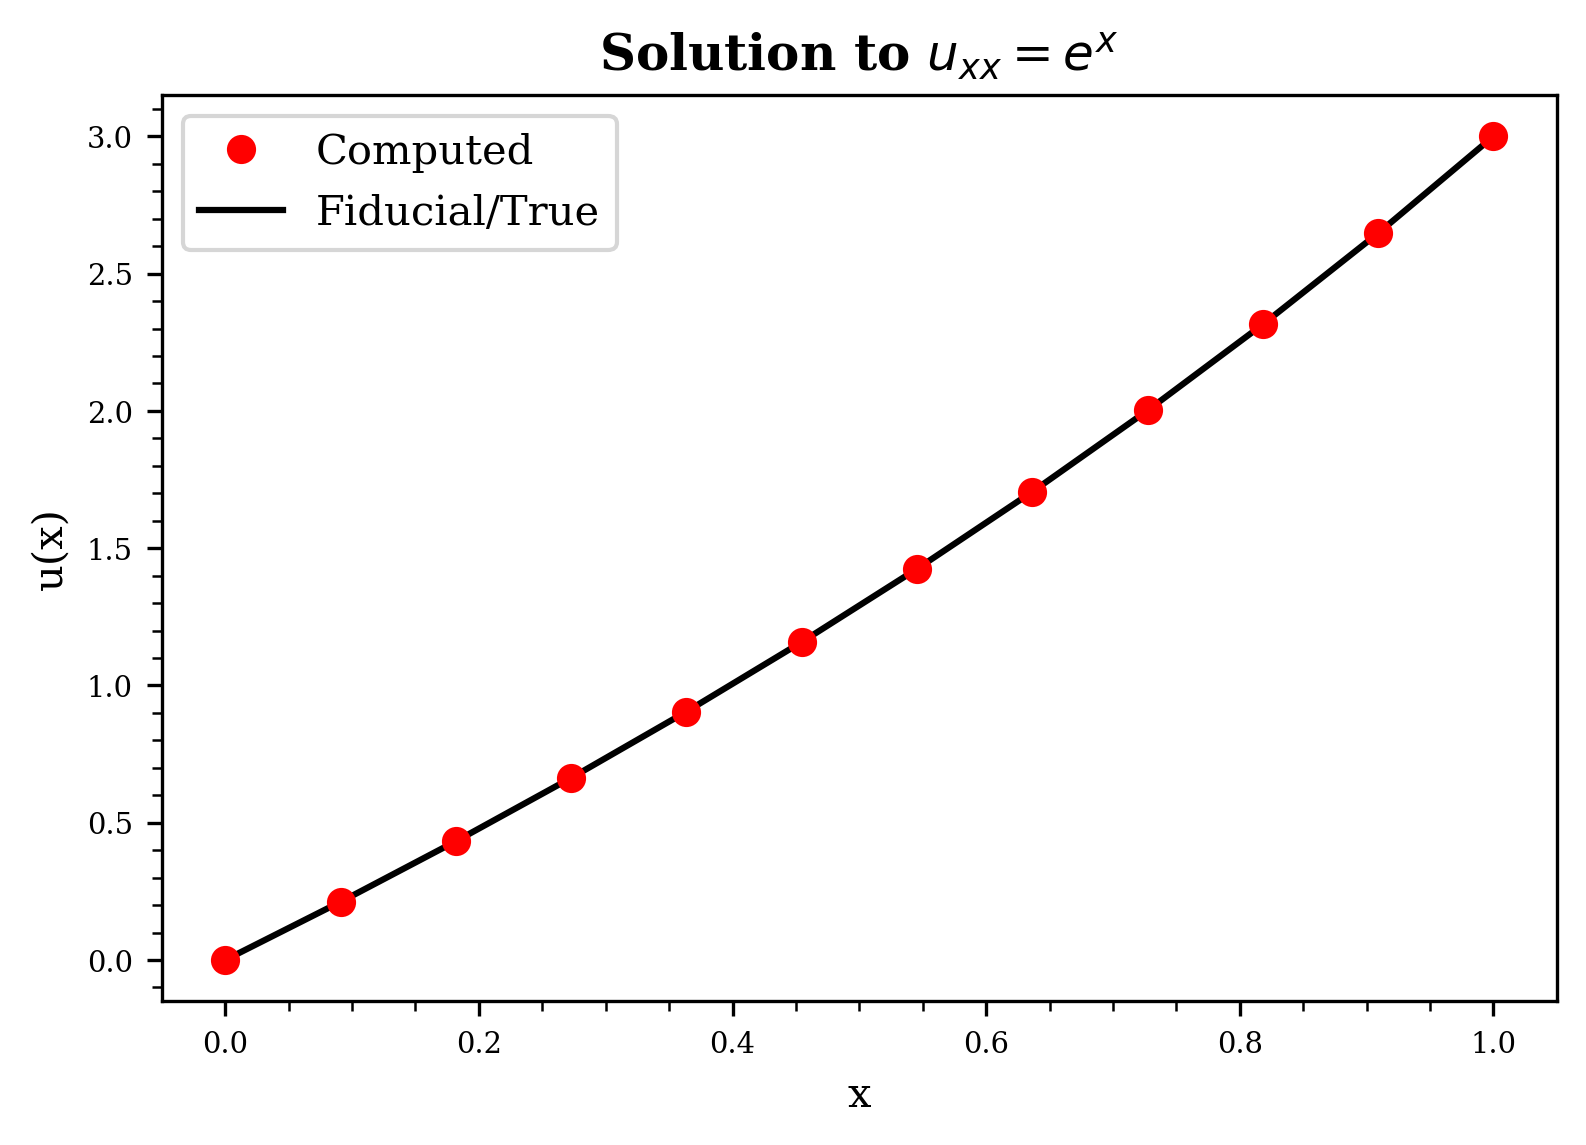

In [3]:
# Solve system
U = np.empty(N + 2)
U[0] = u_a
U[-1] = u_b
U[1:-1] = np.linalg.solve(A, b)

# Plot result
f, a = plt.subplots()
a.plot(x_bc, U, 'ro', zorder=1, label="Computed")
a.plot(x_bc, u_true(x_bc), 'k', zorder=0, label="Fiducial/True")
a.set_title("Solution to $u_{xx} = e^x$", fontweight="bold")
a.set_xlabel("x")
a.set_ylabel("u(x)")
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
a.legend()
plt.show()

### 3. Visualize the local truncation error at $x=0.5$ for the five-point stencil (this problem) and centered three-point stencil (Lecture 23) as a function of step size $\Delta x$

Now, **x = 0.5** only occurs in the case that **N is ODD**. Therefore, the truncation error can be calculated for the odd values of N using the following equations:
**THREE-POINT STENCIL:**
$$
\tau_i = \frac{1}{\Delta x^2} (u(x_{i+1}) - 2u(x_i) + u(x_{i-1})) - f(x_i)
$$ 

**FIVE-POINT STENCIL:**
$$ 
\tau_i = \frac{1}{12\Delta x^2}(-u(x_{i+2}) + 16u(x_{i+1}) - 30u(x_i) + 16u(x_{i-1})- u(x_{i-2})) - f(x_i) 
$$ 

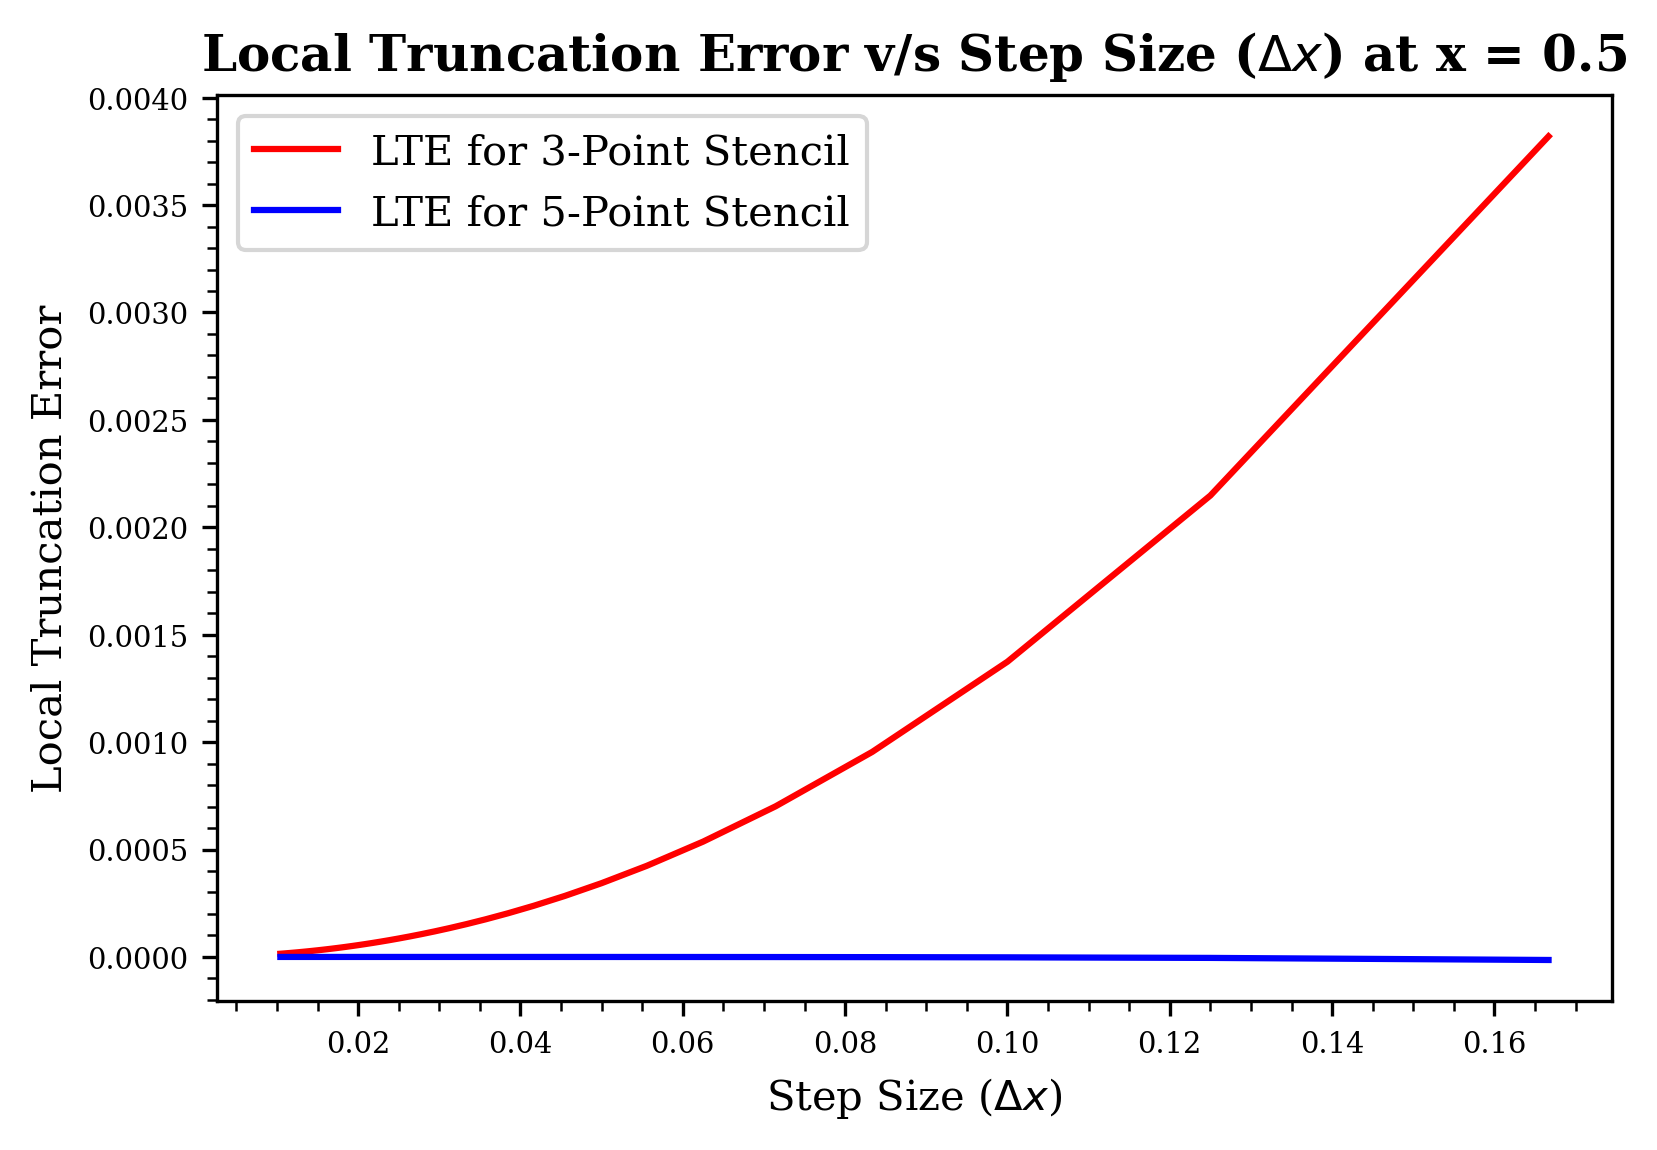

In [4]:
"""err_3 --> Truncation Error for Three-Point Stencil at x = 0.5
   err_5 --> Truncation Error for Five-Point Stencil at x = 0.5
"""
# Creating lists to store delta_x, err_3, and err_5. Also creating the array of values for N
N = list(np.arange(5,97,2))
dx = []
te3 = []
te5 = []

# Problem setup
a = 0.0
b = 1.0
f = lambda x: np.exp(x)
u_true = lambda x: (4.0 - np.exp(1.0)) * x - 1.0 + np.exp(x)

# Loop for N
for i in N:
    # Discretization
    x_bc = np.linspace(a, b, i + 2)
    x = x_bc[1:-1]
    delta_x = (b - a) / (i + 1)
    dx.append(delta_x)
    for foo in range(len(x)):
        if x[foo] == 0.5: # x = 0.5
            err_3 = ((1/delta_x**2)*(u_true(x[foo+1]) - 2*u_true(x[foo]) + u_true(x[foo-1])) - f(x[foo]))
            te3.append(err_3)
            err_5 = ((1/(12*delta_x**2))*(-u_true(x[foo+2]) + 16*u_true(x[foo+1]) -30*u_true(x[foo]) + 16*u_true(x[foo-1]) - u_true(x[foo-2])) - f(x[foo]))
            te5.append(err_5)
            
# Plot the Truncation Error v/s delta_x
f, a = plt.subplots()
a.plot(dx, te3, 'r', label="LTE for 3-Point Stencil")
a.plot(dx, te5, 'b', label="LTE for 5-Point Stencil")
a.set_title(r"Local Truncation Error v/s Step Size ($\Delta x$) at x = 0.5", fontweight="bold")
a.set_xlabel(r"Step Size ($\Delta x$)")
a.set_ylabel("Local Truncation Error")
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
a.legend()
plt.show()       

## Problem 2: Particle in a Box [20 points]

In this problem you will solve the stationary Schr\"odinger Equation
$$ \hat{H}\Psi = E\Psi\,,$$
with $\hat{H}$ the Hamiltonian Operator, and the eigenvalues $E$ are the energy of a particle with wavefuntion $\Psi$.

We will consider the one-dimensional case of a particle in a box $x \in [0, 1]$ with potential $V(x)$. After defining $2m= \hbar=1$ to obtain a dimensionless problem, $\hat{H}$ can be written as
$$\hat{H}= -\frac{\partial^2}{\partial x^2}+V(x)$$
and infinite walls, corresponding to boundary conditions $\Psi(0)=\Psi(1) = 0$.

### 1. Derive the Finite Difference approximation for $\hat{H}$ using the second-order (three-point) stencil for the second-order derivative.

### 2. Solve this system for $V(x)=0,\,x \in [0, 1]$ and visualize the lowest eigenstates.

Number of Eigenvalues: 5
Corresponding Eigenvalues are: [  9.64617093 134.35382907 108.          72.          36.        ]
Number of Eigenvectors: 5
Corresponding Eigenvectors are: [[-2.88675135e-01  2.88675135e-01 -5.00000000e-01  5.77350269e-01
  -5.00000000e-01]
 [-5.00000000e-01 -5.00000000e-01  5.00000000e-01  1.12996416e-16
  -5.00000000e-01]
 [-5.77350269e-01  5.77350269e-01  5.60329609e-17 -5.77350269e-01
   3.42670851e-16]
 [-5.00000000e-01 -5.00000000e-01 -5.00000000e-01 -7.43018867e-17
   5.00000000e-01]
 [-2.88675135e-01  2.88675135e-01  5.00000000e-01  5.77350269e-01
   5.00000000e-01]]
Lowest Eigenstates are: [ 1.          3.73205081  7.46410162 11.19615242 13.92820323]


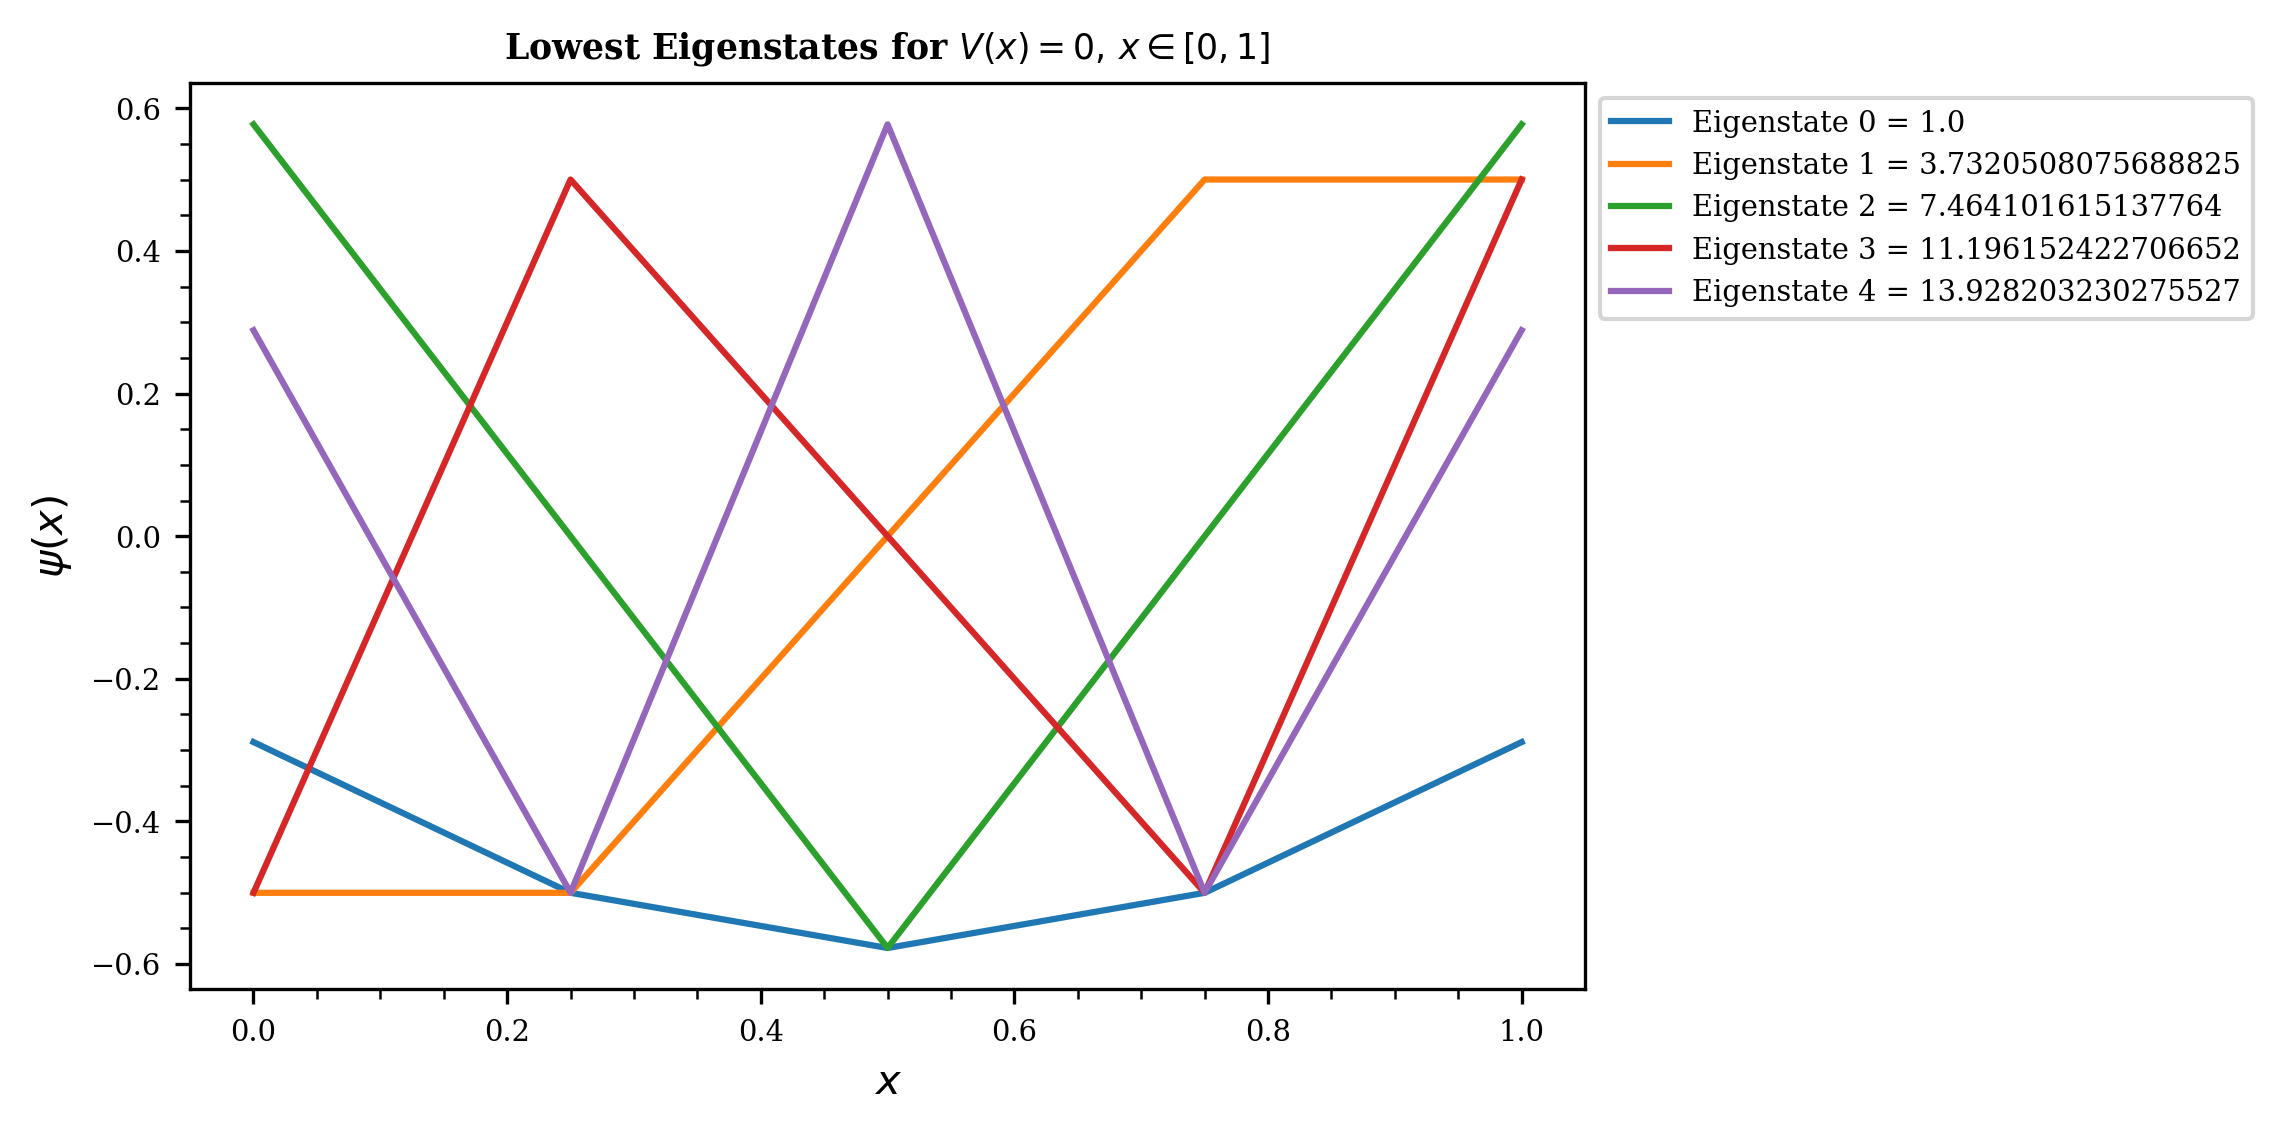

In [5]:
# Problem setup
a = 0.0
b = 1.0
u_a = 0.0
u_b = 0.0

# Discretization
N = 5
x = np.linspace(a, b, N)
dx = (b - a) / (N + 1)

# Constructing H and V
H = np.zeros((N, N))
diagonal = np.ones(N) / (dx**2)
V = 0
H += np.diag((diagonal*2)+V, 0)
H += np.diag(diagonal[:-1]*(-1), 1)
H += np.diag(diagonal[:-1]*(-1), -1)
             
# Eigenvalues and Eigenvectors
val, vec = np.linalg.eig(H)
k = np.argsort(val)
k = k[0:5]
E = val[k]/val[k][0]
print(f"Number of Eigenvalues: {len(val)}")
print(f"Corresponding Eigenvalues are: {str(val)}")
print(f"Number of Eigenvectors: {len(vec)}")
print(f"Corresponding Eigenvectors are: {str(vec)}")
print(f"Lowest Eigenstates are: {str(E)}")  
      
#Plot the Eigenstates
f, a = plt.subplots()
for i in range(len(k)):
      y = []
      y = np.append(y,vec[:,k[i]])
      a.plot(x, y, '-', label=f"Eigenstate {i} = {E[i]}")
      a.set_title(r"Lowest Eigenstates for $V(x)=0,\,x \in [0, 1]$", fontweight="bold", fontsize = 'small')
      a.set_xlabel(r"$x$")
      a.set_ylabel(r"$\psi (x)$")
      a.xaxis.set_minor_locator(AutoMinorLocator()) 
      a.yaxis.set_minor_locator(AutoMinorLocator())
      a.tick_params(which='minor', length=2.5, color='k')
a.legend(fontsize='x-small', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()            

### 3. Solve this system for $V(x)=1.0, x\in[0.45,0.55]$ and $V(x)=0$ elsewhere inside the box, and visualize the lowest eigenstates.

Number of Eigenvalues: 5
Corresponding Eigenvalues are: [135.02315907  10.31015521  37.          72.66668572 109.        ]
Number of Eigenvectors: 5
Corresponding Eigenvectors are: [[ 2.90980579e-01  2.86351131e-01 -5.00000000e-01 -5.77350268e-01
  -5.00000000e-01]
 [-5.01320409e-01  4.98647443e-01 -5.00000000e-01 -5.34553030e-03
   5.00000000e-01]
 [ 5.72727073e-01  5.81985836e-01  6.84389309e-17  5.77300776e-01
  -1.91808585e-16]
 [-5.01320409e-01  4.98647443e-01  5.00000000e-01 -5.34553030e-03
  -5.00000000e-01]
 [ 2.90980579e-01  2.86351131e-01  5.00000000e-01 -5.77350268e-01
   5.00000000e-01]]
Lowest Eigenstates are: [ 1.          3.58869476  7.04806904 10.57210079 13.09613254]


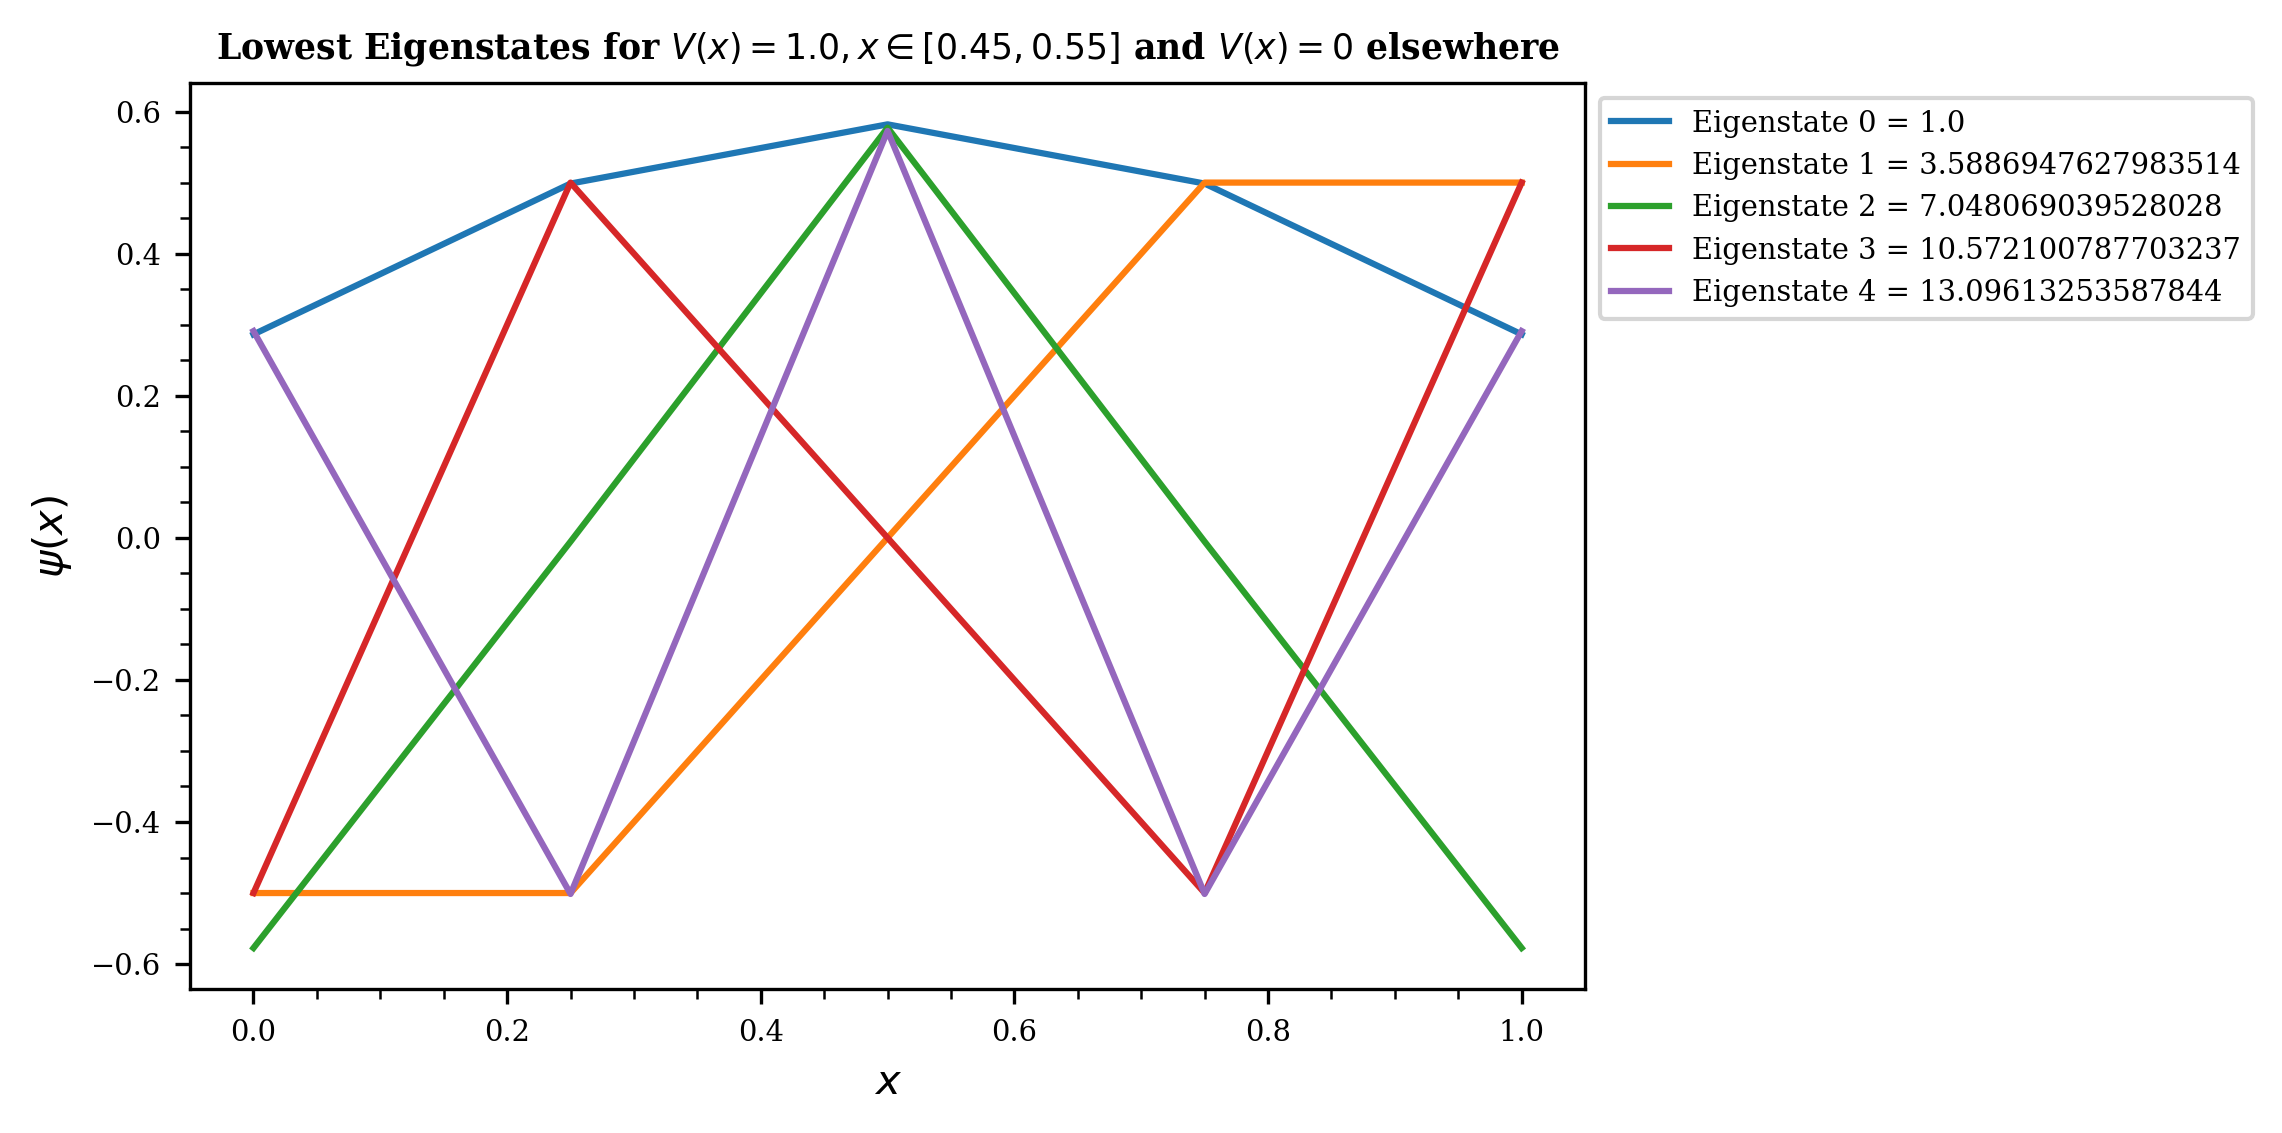

In [6]:
# Problem setup
a = 0.0
b = 1.0
u_a = 0.0
u_b = 0.0

# Discretization
N = 5
x = np.linspace(a, b, N)
dx = (b - a) / (N + 1)

# Function for varying V(x)
def V(x,x0,xf,xi0,xif):
    V=[]
    for i in x: # looping over x-values
        if xi0<=i<=xif:
            V.append(0)
        if x0<=i<=xi0:
            V.append(1)
        if xif<=i<=xf:
            V.append(1)
    return V

# Constructing H and V
H = np.zeros((N, N))
diagonal = np.ones(N) / (dx**2)
V = V(x,a,b,0.45,0.55)
H += np.diag(diagonal[:-1]*(-1), 1)
H += np.diag(diagonal[:-1]*(-1), -1)
for i,j in zip(range(N),V):
    H[i,:] += np.diag((diagonal*2)+j, 0)[i]
             
# Eigenvalues and Eigenvectors
val, vec = np.linalg.eig(H)
k = np.argsort(val)
k = k[0:5]
E = val[k]/val[k][0]
print(f"Number of Eigenvalues: {len(val)}")
print(f"Corresponding Eigenvalues are: {str(val)}")
print(f"Number of Eigenvectors: {len(vec)}")
print(f"Corresponding Eigenvectors are: {str(vec)}")
print(f"Lowest Eigenstates are: {str(E)}")  
      
#Plot the Eigenstates
f, a = plt.subplots()
for i in range(len(k)):
      y = []
      y = np.append(y,vec[:,k[i]])
      a.plot(x, y, '-', label=f"Eigenstate {i} = {E[i]}")
      a.set_title(r"Lowest Eigenstates for $V(x)=1.0, x\in[0.45,0.55]$ and $V(x)=0$ elsewhere", fontweight="bold", fontsize = 'small')
      a.set_xlabel(r"$x$")
      a.set_ylabel(r"$\psi (x)$")
      a.xaxis.set_minor_locator(AutoMinorLocator()) 
      a.yaxis.set_minor_locator(AutoMinorLocator())
      a.tick_params(which='minor', length=2.5, color='k')
a.legend(fontsize='x-small', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()    

## Problem 3: Change of Variables [10 points]

Recall the formula for variable transformation as applied to probability density functions:

$p(y) = p(x)\left|\frac{dx}{dy}\right|$

Consider the function $b=\tan(\theta)$, which is sometimes used to reparametrize the slope of a line ($b$) with the angle the line makes in a plot or $x$ vs $y$ ($\theta$).

### 1. If $p(\theta)$ is uniform (proportional to a constant) on $-\frac{\pi}{2} < \theta < \frac{\pi}{2}$, work out $p(b)$.

$p(\theta)$ is uniform on $-\pi/2 < \theta < \pi/2$ which means that,
$$ \begin{aligned}
   \int_{-\pi/2}^{\pi/2} p(\theta) d \theta = k \\
    p(\theta) \int_{-\pi/2}^{\pi/2} d \theta = k \\ 
    p(\theta) [{\pi/2} + {\pi/2}] = k \\
    p(\theta) (\pi) = k \\
    p(\theta) = \frac{k}{\pi}
   \end{aligned}
$$
Now, $$ b = \tan(\theta)\implies \theta = \tan^{-1}(b) $$ <br>
$$ p(y) = p(x)|\frac{dx}{dy}| \implies p(b) = p(\theta)|\frac{d\theta}{db}| $$ <br>
$$ |\frac{d\theta}{db}| = \frac{1}{1+b^2} $$ and $$ p(\theta) = \frac{k}{\pi} $$ <br>
$$ \therefore p(b) = \frac{k}{\pi(1+b^2)} $$

### 2. Demonstrate that you're correct by generating a bunch of uniform random $\theta$'s, transforming each one to its corresponding $b$, and comparing a histogram of $b$ with your answer to (1).

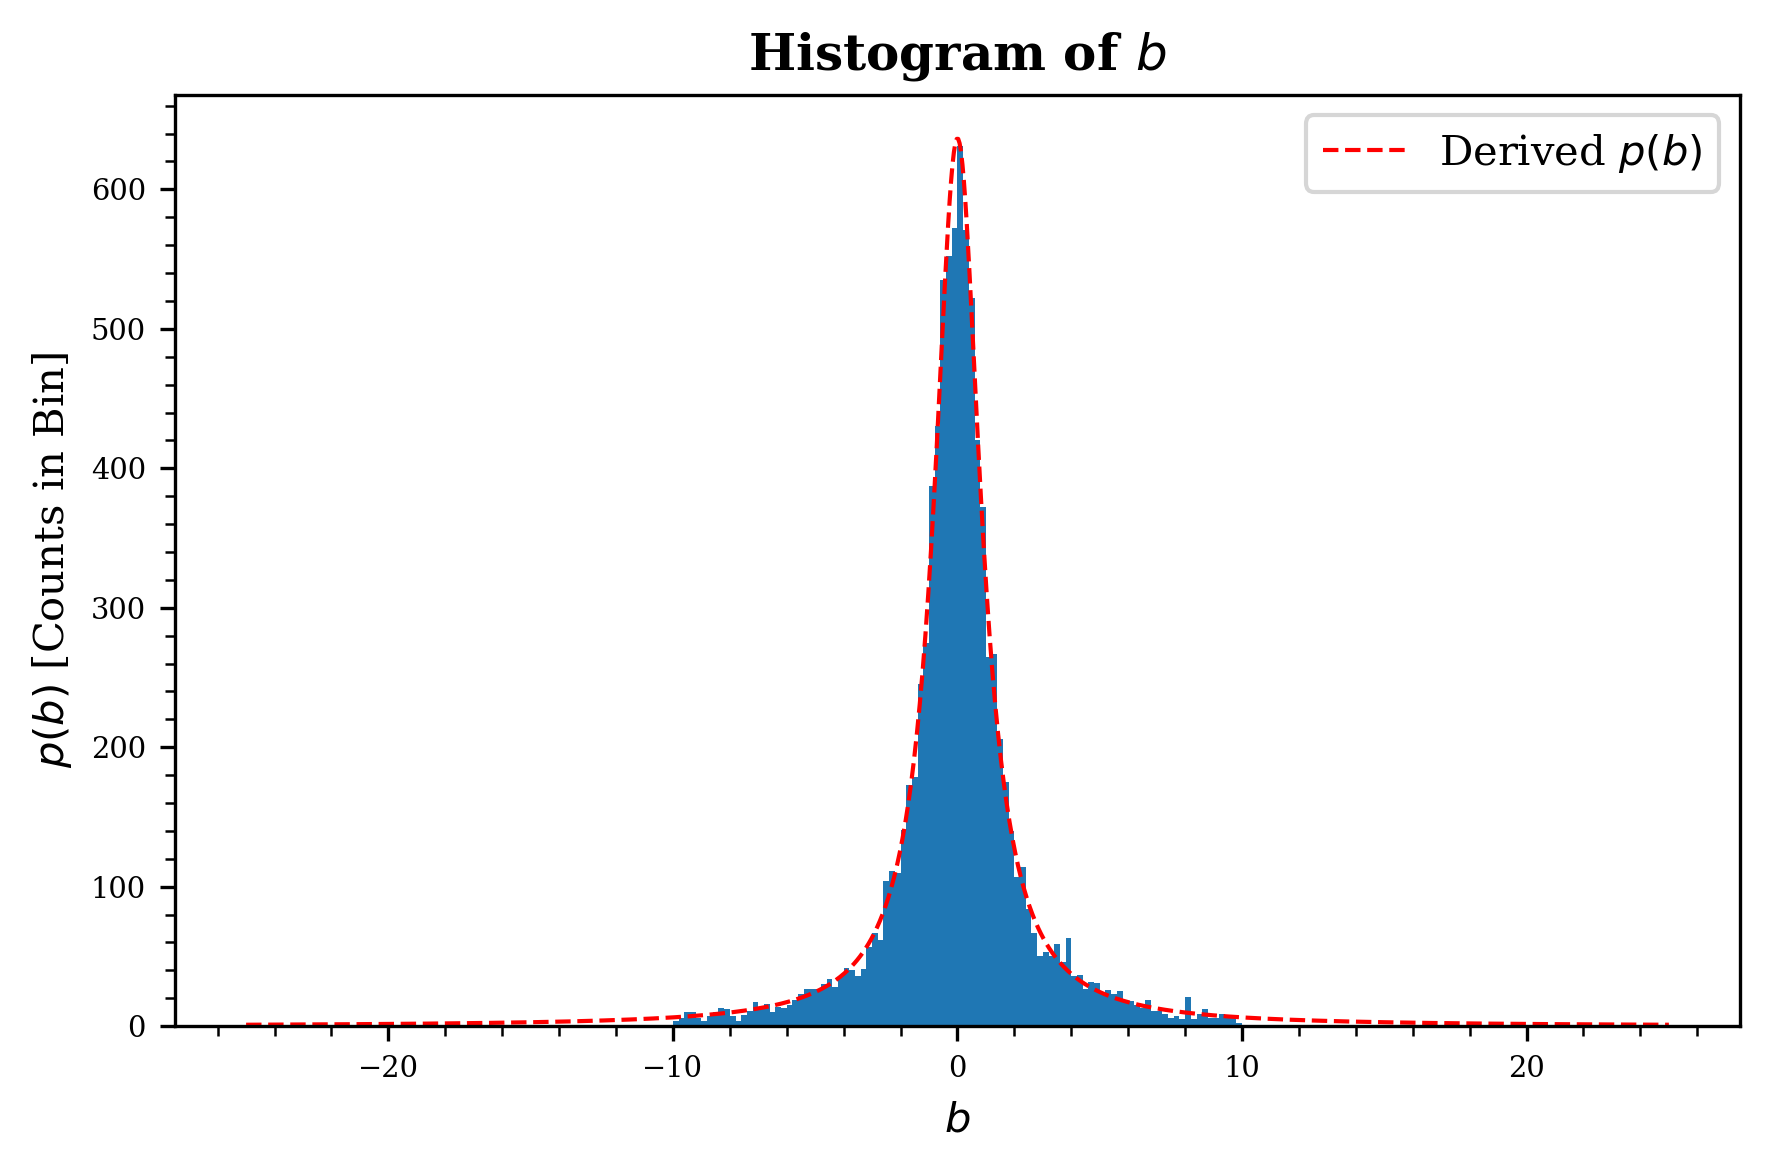

In [7]:
# For the derived model 
x = np.linspace(-25,25,1000) 
p_b = 2000/((np.pi)*(1+x**2))

# generate a bunch of random theta
theta = -np.pi*random.rand(10000) + np.pi/2 

# transform each theta into b
b = np.tan(theta)

# plot histogram of b
f,a = plt.subplots()
a.hist(b, bins=100, range=(-10,10))
a.plot(x, p_b, 'r--', lw=1, label=r'Derived $p(b)$')
a.set_title(r'Histogram of $b$', fontweight = 'bold')
a.set(xlabel=r'$b$', ylabel=r'$p(b)$ [Counts in Bin]')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
a.legend()
f.tight_layout()
plt.show()

### 3. Now try the reverse problem: find $p(\theta)$ if $p(b)$ is taken to be uniform (say over $-100<b<100$).

$p(b)$ is uniform on $-100 < b < 100$ which means that,
$$ \begin{aligned}
   \int_{-100}^{100} p(b) db = k \\
    p(b) \int_{-100}^{100} db = k \\ 
    p(b) [{100} + {100}] = k \\
    p(b) (200) = k \\
    p(b) = \frac{k}{200}
   \end{aligned}
$$
Now, $$ b = \tan\theta \implies \theta = \tan^{-1}(b) $$ <br>
$$ p(y) = p(x)|\frac{dx}{dy}| \implies p(b) = p(\theta)|\frac{d\theta}{db}| $$ <br>
$$ \therefore p(\theta)= p(b)|\frac{db}{d\theta}| $$
$$ |\frac{db}{d\theta}| = \sec^2(\theta) $$ and $$ p(b) = \frac{k}{200} $$ <br>
$$ \therefore p(\theta) = \frac{k \sec^2(\theta)}{200} $$

### 4. Compare your answer to (3) with a histogram of transformed samples from $p(b)$.

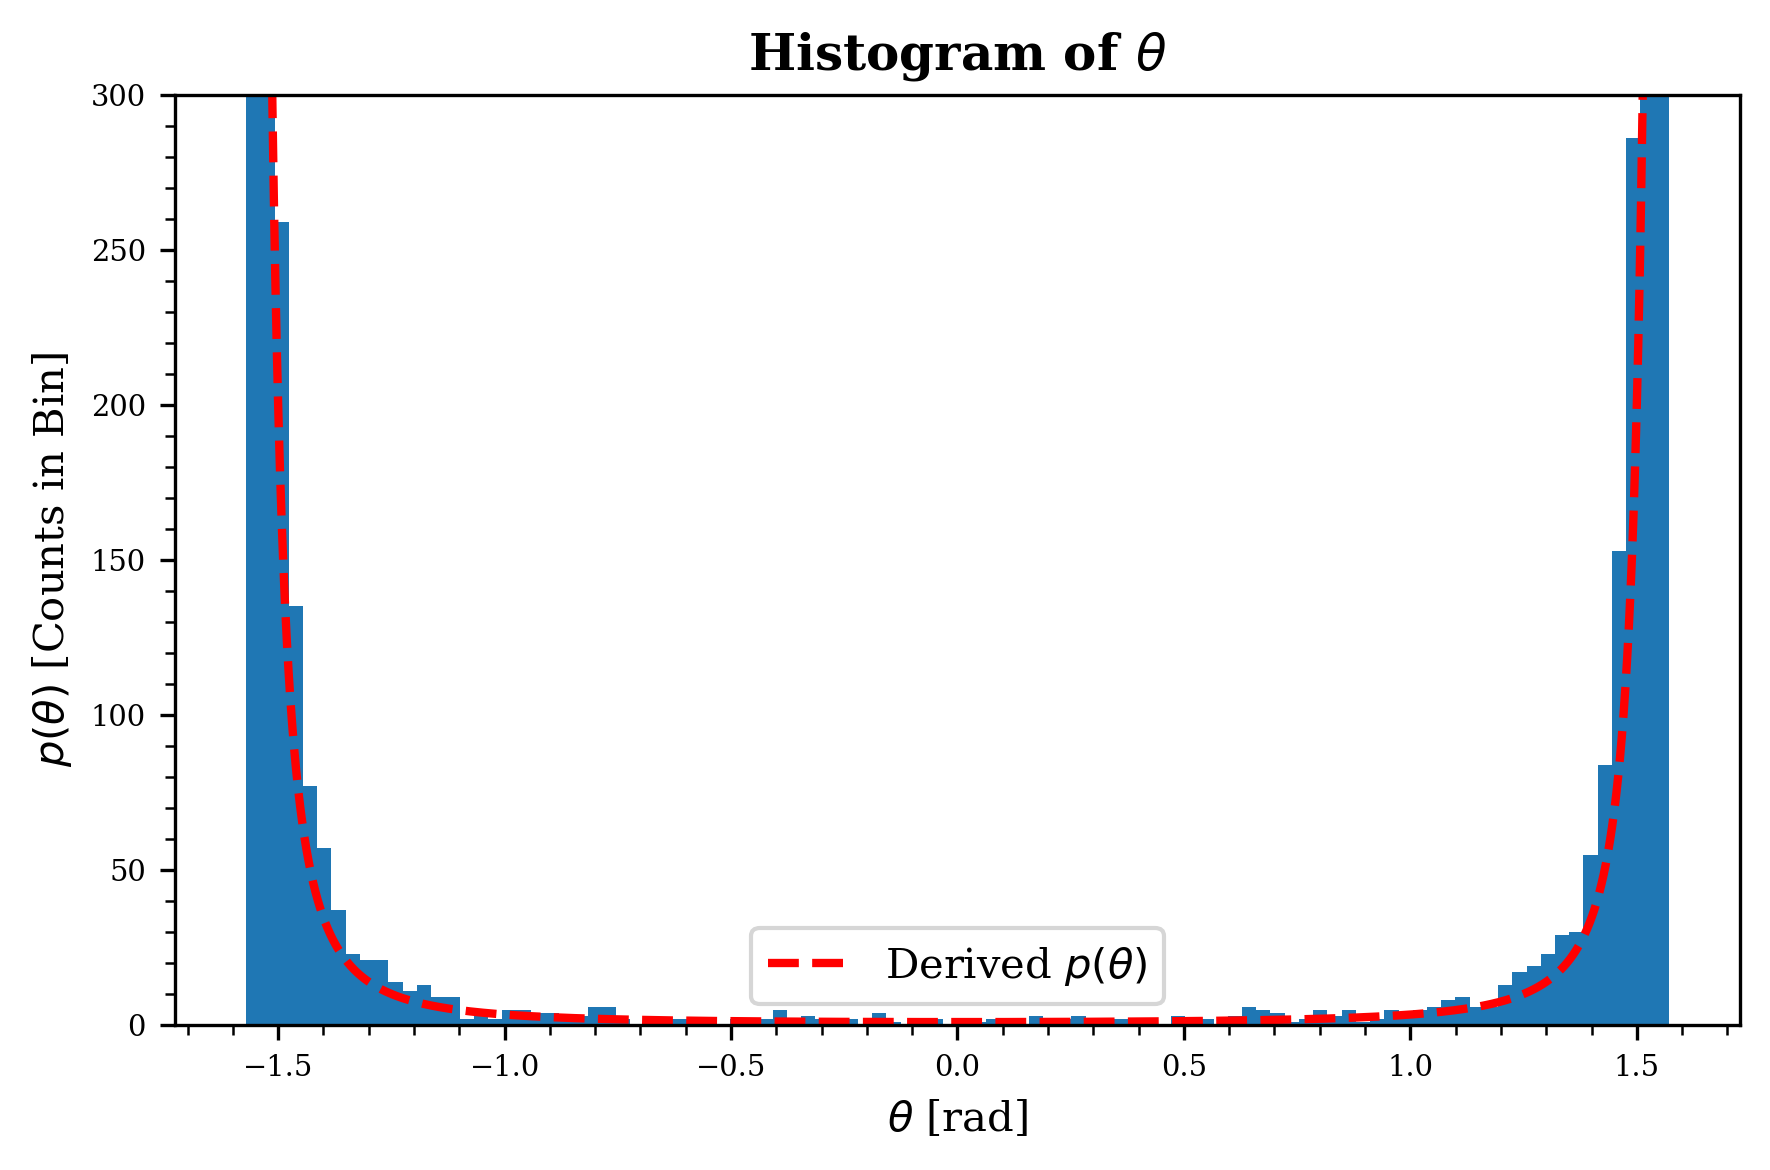

In [8]:
# For the derived model 
x = np.linspace(-np.pi/2,np.pi/2,10000) 
p_theta = 200/((200)*(np.cos(x)**2))

# generate a bunch of random b
b = -200*random.rand(10000) + 100 

# transform each b into theta
theta = np.arctan(b)

# plot histogram of b
f,a = plt.subplots()
a.hist(theta, bins=100, range=(-np.pi/2,np.pi/2))
a.plot(x, p_theta, 'r--', lw=2, label=r'Derived $p(\theta)$')
a.set_title(r'Histogram of $\theta$', fontweight = 'bold')
a.set(xlabel=r'$\theta$ [rad]', ylabel=r'$p(\theta)$ [Counts in Bin]')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
a.set_ylim(0,300)
a.legend()
f.tight_layout()
plt.show()